In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import import_ipynb

In [5]:
##Importing the files with a comma separator provides some bugs####
from Data_investigation import Drop_Cols
from Data_investigation import Load_and_Combine

In [6]:
from Data_investigation import Filter_Data

In [7]:
path1='./ka_devices.db'
path2='./ka_users.csv'
path3='./ka_actions.parquet'
columns_drop=['game_stats_tutorial_complete','index','device_os_s','device_mapped_s','geo_s','device_manufacturer_s','device_model_s','device_gpu_s','lang_s']

In [8]:
df_F=Load_and_Combine(path1,path2,path3)

In [9]:
df_F,s_nlls=Filter_Data(df_F)

In [10]:
df_F=Drop_Cols(df_F,columns_drop)

In [29]:
### Use percentile to group data
def Calc_Perc(value):
    perc=df_F.total_spend.quantile(value)
    return perc

perc=[Calc_Perc(i) for i  in [0.25,0.5,0.75,0.99]]
    

In [45]:
### We assign grouping based on 99th percentile which is 80 dollars 
df_F=df_F.assign(Spending_Likelihood=pd.cut(df_F['total_spend'], 
                               bins=[-1, 80,9999], 
                               labels=['Not as Likely', 'Likely']))


In [76]:
log_columns=['redeemer_actions','device_mem_i','game_stats_xp','scribe_actions','game_stats_xp1']
for i in log_columns:
    df_F['Log_'+str(i)]=np.log10(df_F[i])


C:\Users\olaiyat\Anaconda3\envs\DS\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
### Visualize to build general profile about total_Spending, use key variables
# a mapping function would work here to try the different combinations. BUt we have a size constraint on notebook so we do this one by one
'''
def Frame_Plot(x=x_val,y=y_val,hue=hue):
    sns.lmplot(x=x_val, y =y_val,hue=hue, col ='Spending_Likelihood',data=df_F)

''

#x_val=['Log_redeemer','Log_device_mem_i']
#y_val='game_stats_tutorial_complete_time','Log_game_stats_xp'
#hue=['platform_s','region_s']


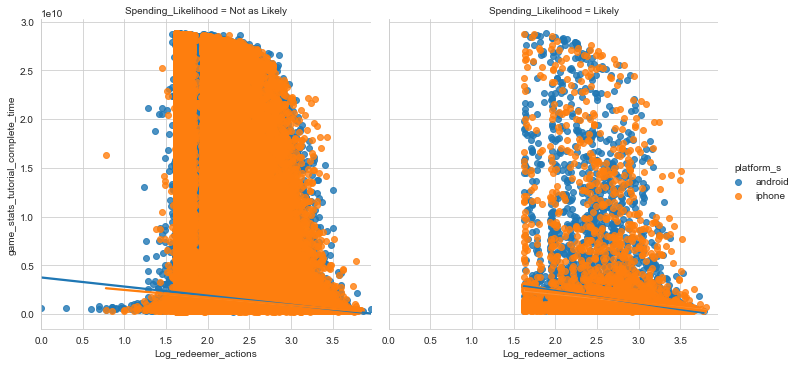

In [88]:
sns.lmplot(x='Log_redeemer_actions', y ='game_stats_tutorial_complete_time',hue='platform_s', col ='Spending_Likelihood',data=df_F)


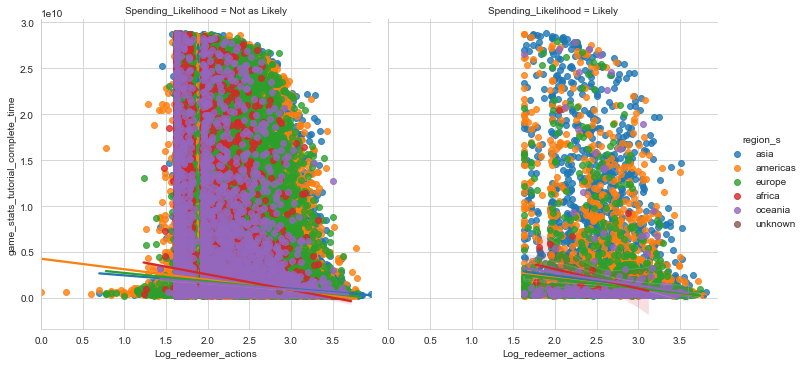

In [89]:
sns.lmplot(x='Log_redeemer_actions', y ='game_stats_tutorial_complete_time',hue='region_s', col ='Spending_Likelihood',data=df_F)


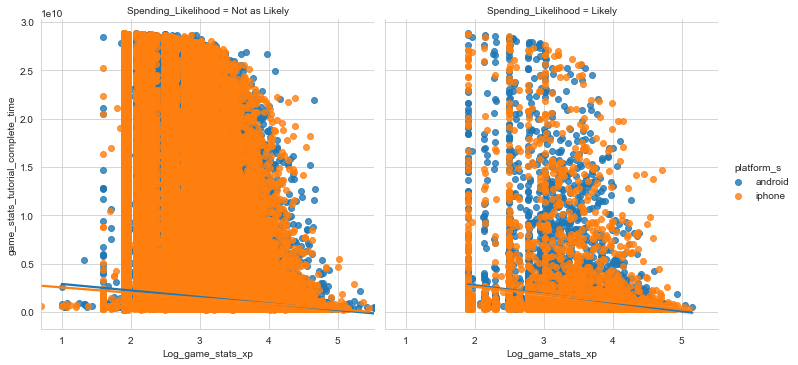

In [90]:
sns.lmplot(x='Log_game_stats_xp', y ='game_stats_tutorial_complete_time',hue='platform_s', col ='Spending_Likelihood',data=df_F)


In [ ]:
#sns.lmplot(x='Log_game_stats_xp', y ='game_stats_tutorial_complete_time',hue='region_s', col ='Spending_Likelihood',data=df_F)


In [ ]:
#sns.lmplot(x='Log_device_mem_i', y ='Log_game_stats_xp',hue='platform_s', col ='Spending_Likelihood',data=df_F)


In [ ]:
#sns.lmplot(x='Log_device_mem_i', y ='Log_game_stats_xp',hue='region_s', col ='Spending_Likelihood',data=df_F)


In [ ]:
#sns.lmplot(x='Log_scribe_actions', y ='Log_game_stats_xp1',hue='region_s', col ='Spending_Likelihood',data=df_F)

In [ ]:
#sns.lmplot(x='Log_scribe_actions', y ='Log_game_stats_xp1',hue='platform_s', col ='Spending_Likelihood',data=df_F)

In [87]:
test=df_F.loc[df_F['Spending_Likelihood']=='Likely']
test['Log_scribe_actions'].describe()

count    17203.000000
mean         2.450220
std          0.189335
min          2.060698
25%          2.301030
50%          2.457882
75%          2.592177
max          3.073352
Name: Log_scribe_actions, dtype: float64

In [ ]:
#sns.lmplot(x='Log_game_stats_xp', y ='Log_redeemer',hue='platform_s', col ='Spending_Likelihood',data=df_F)


In [ ]:
#sns.lmplot(x='Log_game_stats_xp', y ='Log_redeemer',hue='region_s', col ='Spending_Likelihood',data=df_F)


In [ ]:
## NEgative relationships between redeemer actions and time taken to complete tutorial. 
## For those who are likley to make considerable purchases... redeemer actions are slightly larger for those likely to spend.
## Given your redeemer actions are below log(1.5) '31' its not likely that you will be spending money 
### Of those who are likely to spend, those in the Oceania region have the fastest complete time. Compared to those who don't spend 
### Not much are likely to spend in Africa, could be an emerging market?
## What percentage of people in Oceania region are likely to spend vs not spend??????
##### Given they are likley to spend People in Oceania also seem to all be over the 31 redeemer actions 
## Iphone users who are likley to spend complete the tutorial in under 10,000 seconds or just under 3 hours.. Big focus!!!
#### To be likely to spend, your game_stats_xp has to be at least 80. calculated above. 

##### Above uses total time to complete tutorial as fixed Y


### linear relationship between redeemer and game_stats. if you are likley to spend 
## FOr those likely to Spend, the device_memory is 794 for android and apple. except for an outlier 
### GIven you are likely to spend, Asia seem to have more memory on their device 
## Android users also have much more memory on their devices for likely users. This means certain incentives can be pushed to the game that way 
#### Investigate the median of android vs iphone for device mem given likely 

### If your game_xp1 is not above 31.6, you wont be likely to spend
##3 If your scribe_actions is not above 115 then you wont be likely to spend 